In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import ctvis
%matplotlib inline

In [2]:
df = ctvis.get_df_all()

In [3]:
sample_path = df['FilePathMask'].iloc[0]
sample_path

'public-covid-data/rp_msk/1.nii.gz'

In [4]:
seg_data = ctvis.load_nifti(sample_path)

In [5]:
mask_color = ctvis.label_color(seg_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


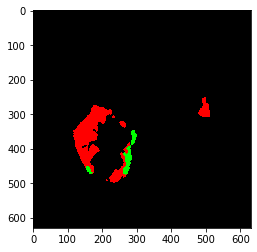

In [6]:
plt.imshow(mask_color[:, :, 30])

In [7]:
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [8]:
volume.shape

(630, 630, 45)

In [9]:
mask.shape

(630, 630, 45)

In [10]:
mask_color.shape

(630, 630, 45, 3)

In [11]:
max_hu = np.max(volume)
min_hu = np.min(volume)
volume_rerange = (volume - min_hu) / max((max_hu - min_hu), 1e-3)

In [12]:
volume_rerange.mean()

0.4494129421902398

In [13]:
volume_rerange = volume_rerange * 255

In [14]:
volume_rerange.min()

0.0

In [15]:
volume_rerange.max()

255.0

In [16]:
volume_rerange.shape

(630, 630, 45)

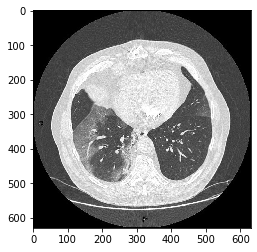

In [17]:
plt.imshow(volume_rerange[:, :, 30], cmap='gray')

In [18]:
volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)

In [19]:
volume_rerange.shape

(630, 630, 45, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


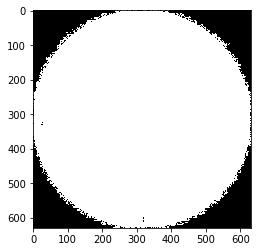

In [20]:
plt.imshow(volume_rerange[:, :, 30])

In [21]:
np.unique(volume_rerange)

array([  0.        ,   1.00123708,   2.00249329,   2.99697882,
         3.9982159 ,   4.99947211,   6.00070919,   7.00196539,
         8.00320247,   8.99768801,   9.99892509,  11.0001813 ,
        12.00141838,  13.00267458,  14.00393079,  14.9983972 ,
        15.9996534 ,  17.00089048,  18.00214669,  19.00338377,
        19.9978693 ,  20.99912551,  22.00036259,  23.0016188 ,
        24.00285588,  25.00411208,  25.99859762,  26.9998347 ,
        28.00109091,  29.00232799,  30.00358419,  30.9980506 ,
        31.99930681,  33.00054389,  34.00180009,  35.00303717,
        36.00429338,  36.99877891,  38.00001599,  39.0012722 ,
        40.00250928,  41.00376549,  42.00500257,  42.9994881 ,
        44.00074431,  45.00198139,  46.0032376 ,  47.00447468,
        47.99896021,  49.00021642,  50.0014535 ,  51.0027097 ,
        52.00394678,  53.00520299,  53.9996694 ,  55.0009256 ,
        56.00216268,  57.00341889,  58.00465597,  58.99914151,
        60.00039771,  61.00163479,  62.002891  ,  63.00

In [22]:
np.unique(volume_rerange.astype(np.uint8))

array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  17,  18,  19,  20,  22,  23,  24,  25,  26,  28,  29,  30,
        31,  33,  34,  35,  36,  38,  39,  40,  41,  42,  44,  45,  46,
        47,  49,  50,  51,  52,  53,  55,  56,  57,  58,  60,  61,  62,
        63,  64,  66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

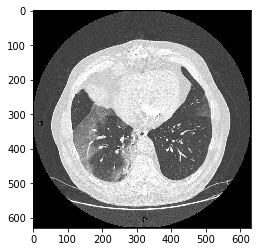

In [23]:
plt.imshow(volume_rerange[:, :, 30].astype(np.uint8))

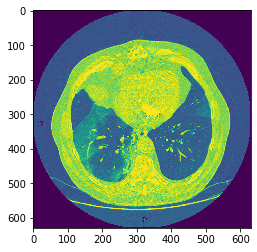

In [24]:
img = ctvis.hu_to_gray(volume[:, :, 30])
plt.imshow(img[:, :, 0])

In [25]:
img.shape

(630, 630, 3)

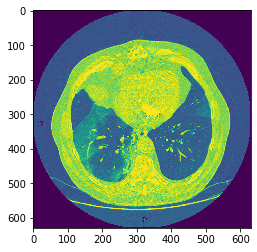

In [26]:
plt.imshow(img[:, :, 1])

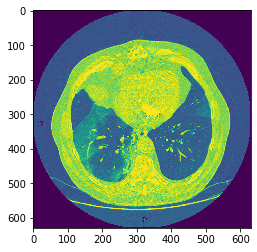

In [27]:
plt.imshow(img[:, :, 2])

In [28]:
original = np.array([[[100, 100, 100]]])
original.shape

(1, 1, 3)

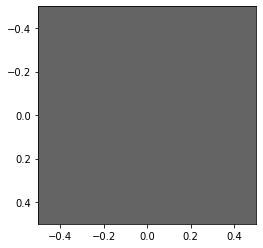

In [29]:
plt.imshow(original)

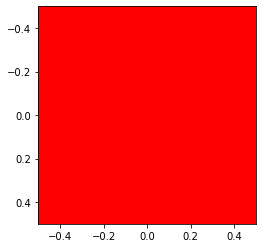

In [30]:
color = np.array([[[255, 0, 0]]])
plt.imshow(color)

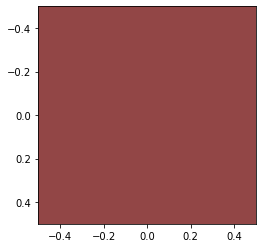

In [31]:
overlayed = (0.7*original + 0.3*color).astype(np.uint8)
plt.imshow(overlayed)

In [32]:
volume_gray = ctvis.hu_to_gray(ctvis.load_nifti(df['FilePathImage'][0]))
overlayed = (0.7*volume_gray + 0.3*mask_color).astype(np.uint8)

In [33]:
overlayed.shape

(630, 630, 45, 3)

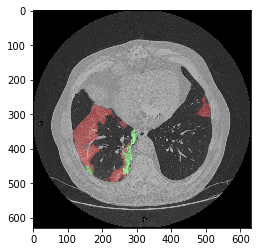

In [34]:
plt.imshow(overlayed[:, :, 30])

In [35]:
overlayed = np.where(mask_color > 0, (0.7*volume_gray + 0.3*mask_color), volume_gray).astype(np.uint8)

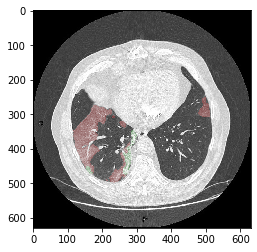

In [36]:
plt.imshow(overlayed[:, :, 30])

In [37]:
np.unique(seg_data, return_counts=True)

(array([0., 1., 2.]), array([17526872,   253695,    79933]))

In [38]:
mask_filter = np.greater(seg_data, 0)
mask_filter = np.stack([mask_filter, mask_filter, mask_filter], axis=-1)

In [39]:
overlayed = np.where(mask_filter, (0.7*volume_gray + 0.3*mask_color).astype(np.uint8), volume_gray)

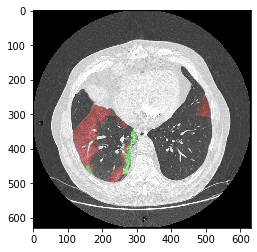

In [40]:
plt.imshow(overlayed[:, :, 30])

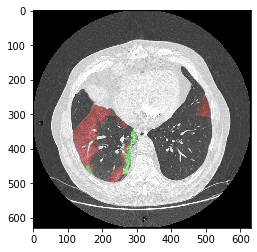

In [41]:
overlayed_ctimg = ctvis.overlay(volume_gray, seg_data, mask_color)

plt.imshow(overlayed_ctimg[:, :, 30])

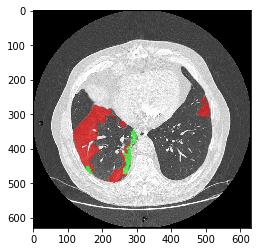

In [42]:
overlayed_ctimg = ctvis.overlay(volume_gray, seg_data, mask_color, 0.6)

plt.imshow(overlayed_ctimg[:, :, 30])

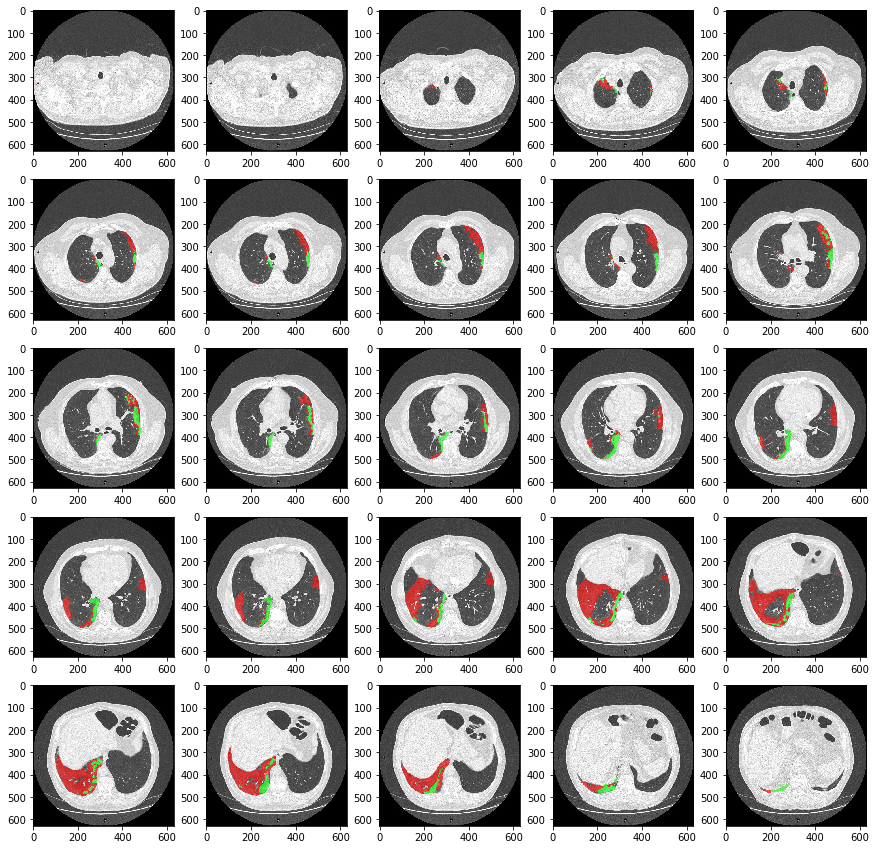

In [43]:
cols = 5
display_num = 25
rows = (display_num - 1) // cols + 1
total_num = overlayed_ctimg.shape[-2]
interval = total_num / display_num
if interval < 1:
    interval = 1
figsize = (15, 15)
fig, axes = plt.subplots(rows, cols, figsize=figsize)

# for i in range(len(overlayed_ctimg)):
#     axes[i//cols, i%cols].imshow(overlayed_ctimg[:, :, i])

# for example
for i in range(display_num):
    row_i = i//cols
    col_i = i%cols
    idx = int(i * interval)  
    if idx >= total_num:
        break
    axes[row_i, col_i].imshow(overlayed_ctimg[:, :, idx])

In [44]:
ctvis.vis_overlay(overlayed_ctimg, cols=4, display_num=12)

TypeError: vis_overlay() missing 2 required positional arguments: 'original_volume' and 'mask_volume'

In [ ]:
# for annotation
cols = 5
display_num = 25
rows = (display_num - 1) // cols + 1
total_num = overlayed_ctimg.shape[-2]
interval = total_num / display_num
if interval < 1:
    interval = 1
figsize = (15, 15)
fig, axes = plt.subplots(rows, cols, figsize=figsize)

for i in range(display_num):
    row_i = i//cols
    col_i = i%cols
    idx = int(i * interval)  
    if idx >= total_num:
        break
    axes[row_i, col_i].imshow(overlayed_ctimg[:, :, idx])
    axes[row_i, col_i].set_title(f'slice #: {idx}')
    axes[row_i, col_i].axis('off')

In [ ]:
#  for the funciton to return HU statistics
label_dict = {1: 'ggo', 2: 'consolidation', 3: 'effusion'}
result = {}

for label in label_dict.keys():
    prefix = label_dict[label]
    roi_hu = volume[np.equal(mask, label)]
    result[prefix + '_mean'] = np.mean(roi_hu)
    result[prefix + '_std'] = np.std(roi_hu)

In [ ]:
result

In [ ]:
ctvis.get_hu_stats(volume, mask)

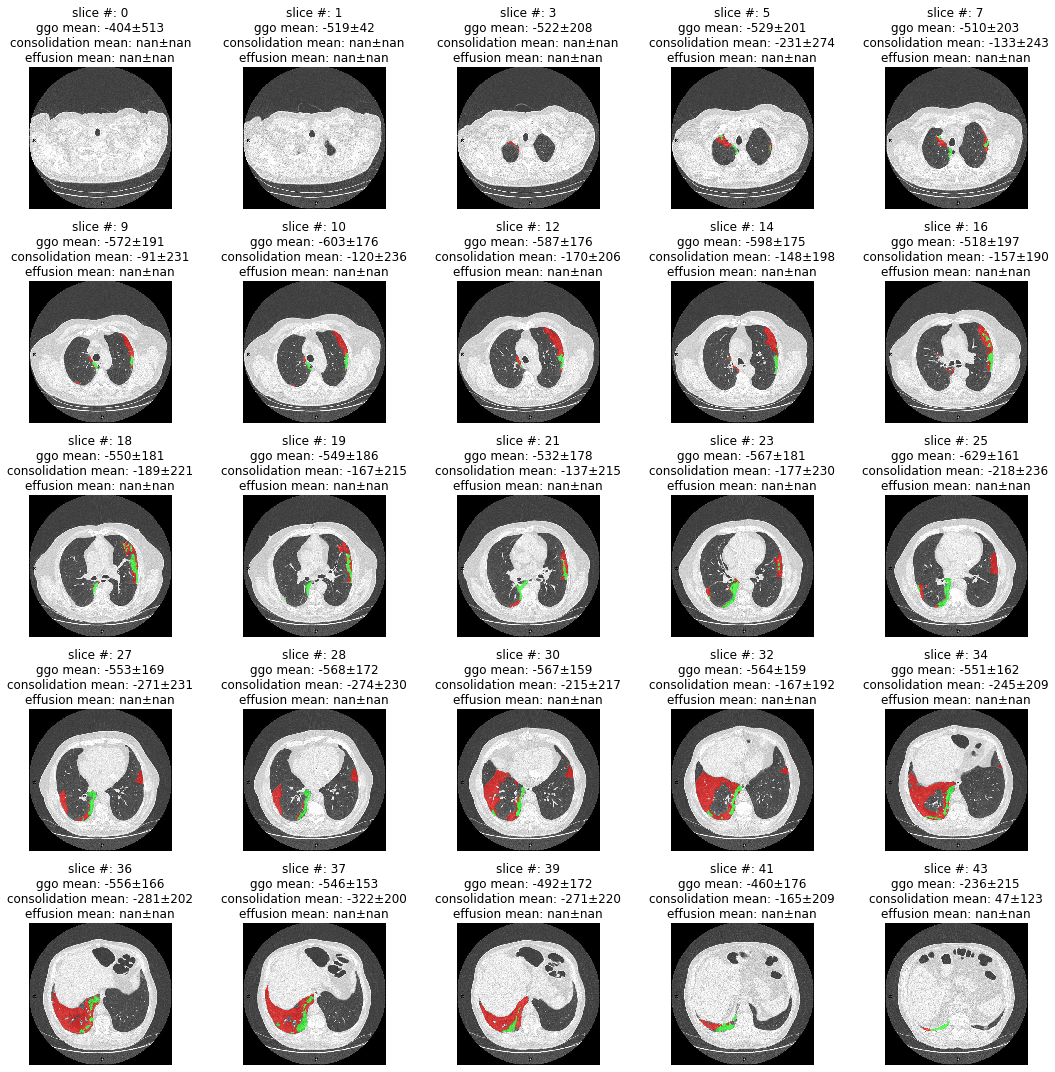

In [52]:
ctvis.vis_overlay(overlayed_ctimg, volume, mask)